In [5]:
import hvplot.pandas
import pandas as pd
import requests
from pprint import pprint
from pathlib import Path
import matplotlib.pyplot as plt
import os

from keys import Trip_advisor_key
from keys import geoapify_key

In [2]:
#Preparing the plotting chart
Reviews_df = pd.read_csv('output_data/Reviews.csv')

Districts_df = pd.read_csv('output_data/Districts.csv')

#Reviews_df

#Districts_df

Plotting_df = Reviews_df.merge(Districts_df, on='Location', how='left')

Plotting_df.columns = Plotting_df.columns.str.replace('_x', ' Restaurant').str.replace('_y', ' Location')

Plotting_df = Plotting_df.drop('Restaurant ID', axis=1)

average_reviews = Plotting_df.groupby('Restaurant Name')['Review'].mean().reset_index()

Plotting_df = Plotting_df.merge(average_reviews, on='Restaurant Name', suffixes=('', '_average'))


Plotting_df.head()

,Location,Restaurant Name,Lat Restaurant,Lng Restaurant,Review,Lat Location,Lng Location,Review_average
0,Toronto Distillery District,Archeo Trattoria,43.650682,-79.35963,2,43.6503,-79.3596,3.2
1,Toronto Distillery District,Archeo Trattoria,43.650682,-79.35963,3,43.6503,-79.3596,3.2
2,Toronto Distillery District,Archeo Trattoria,43.650682,-79.35963,1,43.6503,-79.3596,3.2
3,Toronto Distillery District,Archeo Trattoria,43.650682,-79.35963,5,43.6503,-79.3596,3.2
4,Toronto Distillery District,Archeo Trattoria,43.650682,-79.35963,5,43.6503,-79.3596,3.2


In [9]:
#Locations Map
Districts_map = Plotting_df.hvplot.points(
    'Lng Location',
    'Lat Location',
    geo = True,
    tiles = 'OSM',
    color = 'Location',
    frame_width = 800,
    frame_height = 600,
    hover_cols = ['Location','Restaurant Name'],
    size = 200
)


#Districts_map

#Save the map
hvplot.save(Districts_map, 'output_data/districts_map.html')
Districts_map



:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng Location,Lat Location]   (Location,Restaurant Name)

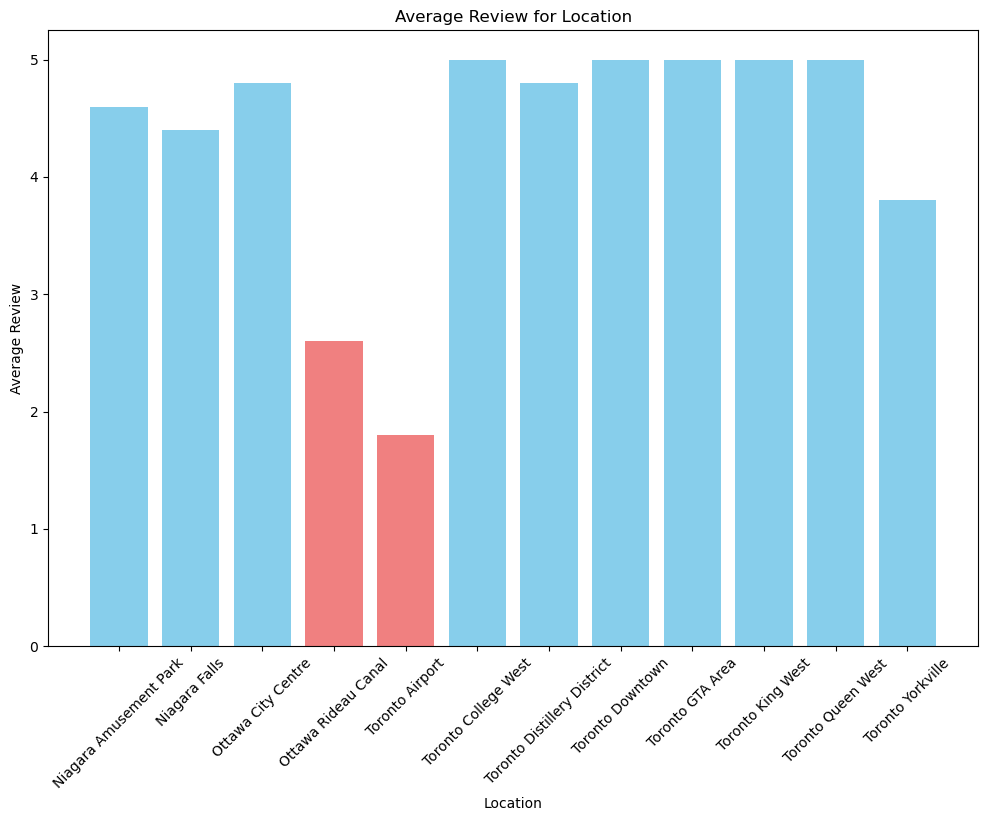

In [4]:
# Mean and color setting
avg_reviews = Plotting_df.groupby(['Location', 'Restaurant Name'])['Review'].mean().reset_index()
colors = ['skyblue' if x >= 3 else 'lightcoral' for x in avg_reviews['Review']]

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(avg_reviews['Location'], avg_reviews['Review'], color=colors)
plt.title('Average Review for Location')
plt.xlabel('Location')
plt.ylabel('Average Review')
plt.xticks(rotation=45)

#Save and show the plot
plt.savefig('output_data/average_review_plot.png')

plt.show()